In [1]:
pip3 install --user linkedin_scraper


SyntaxError: invalid syntax (1435955203.py, line 1)

In [3]:
pip install --user linkedin_scraper

  Obtaining dependency information for linkedin_scraper from https://files.pythonhosted.org/packages/a6/19/4873f3259f020de59dff11ae85e36fc4cf669bc860e6123df00159b7f958/linkedin_scraper-2.11.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [1]:
from linkedin_scraper import Person, actions
from selenium import webdriver
driver = webdriver.Chrome()

In [2]:
email = "mr.spooky26@gmail.com"
password = "mrspooky26"

In [12]:
actions.login(driver, email, password) # if email and password isnt given, it'll prompt in terminal
input("Press Enter")
job = Job("https://www.linkedin.com/jobs/collections/recommended/?currentJobId=3456898261", driver=driver, close_on_complete=False)

TimeoutException: Message: 
Stacktrace:
0   chromedriver                        0x0000000104482d98 chromedriver + 4337048
1   chromedriver                        0x000000010447ae14 chromedriver + 4304404
2   chromedriver                        0x00000001040a7a5c chromedriver + 293468
3   chromedriver                        0x00000001040ecd50 chromedriver + 576848
4   chromedriver                        0x0000000104127908 chromedriver + 817416
5   chromedriver                        0x00000001040e0a5c chromedriver + 526940
6   chromedriver                        0x00000001040e1908 chromedriver + 530696
7   chromedriver                        0x0000000104448de4 chromedriver + 4099556
8   chromedriver                        0x000000010444d2a0 chromedriver + 4117152
9   chromedriver                        0x000000010445352c chromedriver + 4142380
10  chromedriver                        0x000000010444dda0 chromedriver + 4119968
11  chromedriver                        0x0000000104425a74 chromedriver + 3955316
12  chromedriver                        0x000000010446aa48 chromedriver + 4237896
13  chromedriver                        0x000000010446abc4 chromedriver + 4238276
14  chromedriver                        0x000000010447aa8c chromedriver + 4303500
15  libsystem_pthread.dylib             0x00000001808ebfa8 _pthread_start + 148
16  libsystem_pthread.dylib             0x00000001808e6da0 thread_start + 8


In [14]:
import re

In [13]:
re

NameError: name 're' is not defined

In [20]:
import pandas as pd 
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# This will open a new Chrome page to test specified url on (for scraping)
browser=webdriver.Chrome()
browser.get("https://www.linkedin.com/login")

# Requires user to enter username and password
email = "mr.spooky26@gmail.com"
password = "mrspooky26"

# Once username and password are entered, this will automatically click the submit button to login into LinkedIn
actions.login(browser, email, password)

# This is the URL to test the jobs I want to scrape from
browser.get("https://www.linkedin.com/jobs/search/?keywords=software%20developer")

# This will scrape and display (25) job titles from page (1)
job_title=browser.find_elements_by_class_name("job-card-list__title")
company_title=[]
for i in job_title:
    company_title.append(i.text)
print(company_title)
print()
print(len(company_title))


# This will scrape and display (25) company names from page (1) - correspondent to company_title above
job_company=browser.find_elements_by_class_name("job-card-container__company-name")
company_name=[]
for i in job_company:
    company_name.append(i.text)  
print(company_name)
print()
print(len(company_name))



# This will scrape and display (25) location names from page (1) - correspondent to company_title and company_name above
job_location=browser.find_elements_by_class_name("job-card-container__metadata-item")
location_name=[]
for i in job_location:
    location_name.append(i.text)  
print(location_name)
print()
print(len(location_name))

# At this point, I am trying to iterate over each of the (25) jobs to pull out the description. I've successfully been able to pull out (1) description, but haven't been able to pull out the other descriptions of the remaining (24) jobs. 
job_description=browser.find_elements_by_class_name('jobs-search__right-rail')
description_name = []
for i in job_description:
    description_name.append(i.text)
print(description_name)
print()
print(len(description_name))

AttributeError: 'WebDriver' object has no attribute 'find_elements_by_class_name'

In [21]:
import requests
from bs4 import BeautifulSoup
import math


target_url='https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Python%20%28Programming%20Language%29&location=Las%20Vegas%2C%20Nevada%2C%20United%20States&geoId=100293800&currentJobId=3415227738&start={}'
number_of_loops=math.ceil(117/25)
target_url='https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Python%20%28Programming%20Language%29&location=Las%20Vegas%2C%20Nevada%2C%20United%20States&geoId=100293800&currentJobId=3415227738&start={}'
for i in range(0,math.ceil(117/25)):

    res = requests.get(target_url.format(i))
    soup=BeautifulSoup(res.text,'html.parser')
    alljobs_on_this_page=soup.find_all("li")

    for x in range(0,len(alljobs_on_this_page)):
        jobid = alljobs_on_this_page[x].find("div",{"class":"base-card"}).get('data-entity-urn').split(":")[3]
        l.append(jobid)
target_url='https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{}'
for j in range(0,len(l)):

    resp = requests.get(target_url.format(l[j]))
    soup=BeautifulSoup(resp.text,'html.parser')

    try:
        o["company"]=soup.find("div",{"class":"top-card-layout__card"}).find("a").find("img").get('alt')
    except:
        o["company"]=None

    try:
        o["job-title"]=soup.find("div",{"class":"top-card-layout__entity-info"}).find("a").text.strip()
    except:
        o["job-title"]=None

    try:
        o["level"]=soup.find("ul",{"class":"description__job-criteria-list"}).find("li").text.replace("Seniority level","").strip()
    except:
        o["level"]=None



    k.append(o)
    o={}

print(k)

NameError: name 'l' is not defined

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
query = 'Data Scientist'
location = 'United States'

In [3]:
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
chromedriver_path = '/path/to/chromedriver'

driver = webdriver.Chrome()

In [4]:
driver.implicitly_wait(10)


In [4]:
driver.get('https://www.linkedin.com/login')

email_input = driver.find_element(By.ID, 'username')
password_input = driver.find_element(By.ID, 'password')
email_input.send_keys('mr.spooky26@gmail.com')
password_input.send_keys('mrspooky26')
password_input.send_keys(Keys.ENTER)

In [8]:
time.sleep(10)

In [5]:
for page_num in range(1, 15):
    url = f'https://www.linkedin.com/jobs/search/?keywords={query}&location={location}&start={25 * (page_num - 1)}'
    driver.get(url)
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        new_height = driver.execute_script('return document.body.scrollHeight')
        if new_height == last_height:
            break
        last_height = new_height
        
    #jfnjkgndj
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    job_postings = soup.find_all('li', {'class': 'jobs-search-results__list-item'})
    
    # Extract relevant information from each job posting and store it in a list of dictionaries
    data = []
    for job_posting in job_postings:
        try:
            job_title = job_posting.find('a', class_='job-card-list__title').get_text().strip()
        except AttributeError:
            job_title = None
    
        try:
            company_name = job_posting.find('a', class_='job-card-container__link').get_text().strip()
        except AttributeError:
            company_name = None
    
        try:
            location = job_posting.find('li', class_='job-card-container__metadata-item').get_text().strip()
        except AttributeError:
            location = None
    
        data.append({
            'Job Title': job_title,
            'Company Name': company_name,
            'Location': location
    })
time.sleep(20)  # Wait for 20 seconds

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=117.0.5938.92)
Stacktrace:
0   chromedriver                        0x0000000104632d98 chromedriver + 4337048
1   chromedriver                        0x000000010462ae14 chromedriver + 4304404
2   chromedriver                        0x0000000104257a5c chromedriver + 293468
3   chromedriver                        0x00000001042306c0 chromedriver + 132800
4   chromedriver                        0x00000001042c404c chromedriver + 737356
5   chromedriver                        0x00000001042d7198 chromedriver + 815512
6   chromedriver                        0x0000000104290a5c chromedriver + 526940
7   chromedriver                        0x0000000104291908 chromedriver + 530696
8   chromedriver                        0x00000001045f8de4 chromedriver + 4099556
9   chromedriver                        0x00000001045fd2a0 chromedriver + 4117152
10  chromedriver                        0x000000010460352c chromedriver + 4142380
11  chromedriver                        0x00000001045fdda0 chromedriver + 4119968
12  chromedriver                        0x00000001045d5a74 chromedriver + 3955316
13  chromedriver                        0x000000010461aa48 chromedriver + 4237896
14  chromedriver                        0x000000010461abc4 chromedriver + 4238276
15  chromedriver                        0x000000010462aa8c chromedriver + 4303500
16  libsystem_pthread.dylib             0x00000001808ebfa8 _pthread_start + 148
17  libsystem_pthread.dylib             0x00000001808e6da0 thread_start + 8


In [7]:
df = pd.DataFrame(data)


In [8]:
df.to_csv(f'linkedin_jobs_{page_num}.csv', index=False)

In [9]:
driver.quit()


In [11]:
import pandas as pd

df1 = pd.read_csv('linkedin_jobs_1.csv')
df2 = pd.read_csv('linkedin_jobs_2.csv')

df = pd.concat([df1, df2], ignore_index=True)
f.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Location'] = df['Location'].str.replace('Remote', '').str.strip()
df.groupby('Location').size().sort_values(ascending=False)

import matplotlib.pyplot as plt

counts = df.groupby('Location').size().sort_values(ascending=False)
counts.plot(kind='bar', figsize=(10, 5))
plt.title('Number of Job Postings by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'linkedin_jobs_1.csv'

NameError: name 'plt' is not defined

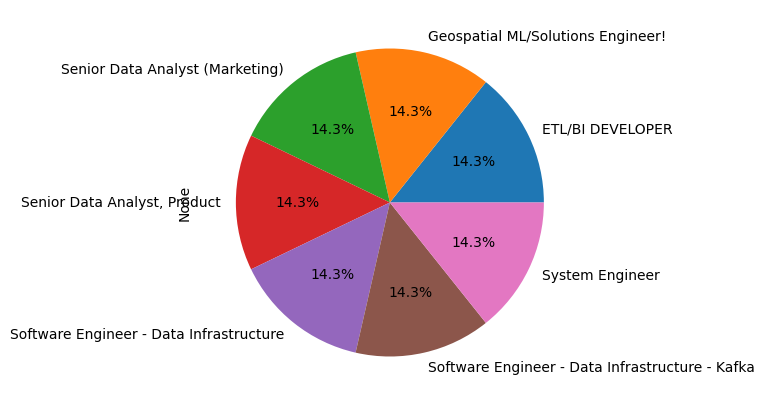

In [12]:
df.groupby('Job Title').size().sort_values(ascending=False)
counts = df.groupby('Job Title').size().sort_values(ascending=False)
counts.plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%')
plt.title('Percentage of Job Postings by Title')
plt.ylabel('')
plt.show()